In [2]:
#Adding required packages
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

    Updating registry at `C:\Users\anoop\.julia\registries\General.toml`
   Resolving package versions...
   Installed SentinelArrays ── v1.4.5
   Installed FilePathsBase ─── v0.9.22
   Installed WeakRefStrings ── v1.4.2
   Installed Tables ────────── v1.12.0
   Installed InlineStrings ─── v1.4.2
   Installed PooledArrays ──── v1.4.3
   Installed WorkerUtilities ─ v1.6.1
   Installed CSV ───────────── v0.10.14
    Updating `C:\Users\anoop\.julia\environments\v1.10\Project.toml`
  [336ed68f] + CSV v0.10.14
    Updating `C:\Users\anoop\.julia\environments\v1.10\Manifest.toml`
  [336ed68f] + CSV v0.10.14
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.22
  [842dd82b] + InlineStrings v1.4.2
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [2dfb63ee] + PooledArrays v1.4.3
  [91c51154] + SentinelArrays v1.4.5
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.12.0
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
  [9fa8497b] + 

In [3]:
#Loading the dataset:StudentPerformanceFactors.csv
using CSV, DataFrames
df = CSV.File("StudentPerformanceFactors.csv") |> DataFrame

Row,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
,Int64,Int64,String7,String7,String3,Int64,Int64,String7,String3,Int64,String7,String7?,String7,String15,Int64,String3,String15?,String15?,String7,Int64
1,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
2,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
5,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
6,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
7,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
8,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
9,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69


In [4]:
#Summary statistics for numerical columns
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Hours_Studied,19.9753,1,20.0,44,0,Int64
2,Attendance,79.9774,60,80.0,100,0,Int64
3,Parental_Involvement,,High,,Medium,0,String7
4,Access_to_Resources,,High,,Medium,0,String7
5,Extracurricular_Activities,,No,,Yes,0,String3
6,Sleep_Hours,7.02906,4,7.0,10,0,Int64
7,Previous_Scores,75.0705,50,75.0,100,0,Int64
8,Motivation_Level,,High,,Medium,0,String7
9,Internet_Access,,No,,Yes,0,String3


In [17]:
#Finding the unique values in some columns
unique_values = unique(df[!,:Parental_Education_Level])

#Finding unique values over all the columns
unique_values_dict = Dict()

for col in names(df)
    unique_values = unique(df[!, col])
    unique_values_dict[col] = unique_values
end

for (col,values) in unique_values_dict
    println("Unique values for $col:",values)
end

Unique values for Access_to_Resources:String7["High", "Medium", "Low"]
Unique values for Physical_Activity:[3, 4, 2, 1, 5, 0, 6]
Unique values for Motivation_Level:String7["Low", "Medium", "High"]
Unique values for Peer_Influence:String15["Positive", "Negative", "Neutral"]
Unique values for Internet_Access:String3["Yes", "No"]
Unique values for Attendance:[84, 64, 98, 89, 92, 88, 78, 94, 80, 97, 83, 82, 68, 60, 70, 75, 99, 74, 65, 62, 91, 90, 66, 69, 72, 63, 61, 86, 77, 71, 67, 87, 73, 96, 100, 81, 95, 79, 85, 76, 93]
Unique values for Distance_from_Home:String15["Near", "Moderate", "Far"]
Unique values for Parental_Education_Level:String15["High School", "College", "Postgraduate"]
Unique values for Sleep_Hours:[7, 8, 6, 10, 9, 5, 4]
Unique values for School_Type:String7["Public", "Private"]
Unique values for Teacher_Quality:String7["Medium", "High", "Low"]
Unique values for Learning_Disabilities:String3["No", "Yes"]
Unique values for Hours_Studied:[23, 19, 24, 29, 25, 17, 21, 9, 10, 1

In [12]:
#To find the missing values, the following code is performed:
filter(row -> any(ismissing, row), df)

Row,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
,Int64,Int64,String7,String7,String3,Int64,Int64,String7,String3,Int64,String7,String7?,String7,String15,Int64,String3,String15?,String15?,String7,Int64
1,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,missing,Female,61
2,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,missing,Public,Neutral,4,No,High School,Far,Male,69
3,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,missing,Moderate,Male,65
4,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,missing,Male,66
5,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,missing,Male,68
6,15,64,Medium,Medium,Yes,6,76,High,Yes,2,Medium,Medium,Private,Positive,4,Yes,High School,missing,Female,63
7,15,70,High,Medium,No,9,57,Medium,Yes,1,Medium,Medium,Private,Negative,3,No,High School,missing,Female,63
8,10,80,High,Medium,Yes,6,93,High,Yes,4,Medium,missing,Public,Negative,3,No,College,Moderate,Female,67
9,20,66,High,High,No,7,73,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,College,missing,Female,65


There are 229 rows which has some missing values. Since the dataset is so large, let's omit all these rows with missing values for better handling the data.

In [15]:
# Remove rows with missing values
df = dropmissing(df)

Row,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
,Int64,Int64,String7,String7,String3,Int64,Int64,String7,String3,Int64,String7,String7,String7,String15,Int64,String3,String15,String15,String7,Int64
1,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
2,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
5,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
6,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
7,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
8,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
9,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69


Now the dataframe df is clean without any missing values. Now, let's begin analyzing the data.

I will be going through some statistical summaries and visualizations first, to understand the data better.

I'm using StatsBase package, which is a powerful tool for statistical analysis.

In [23]:
Pkg.add("StatsBase")
using StatsBase

# Get statistics for a specific column (e.g., 'Hours_Studied')
# To round the figure, we can use thr round function.

mean_hours = round(mean(df.Hours_Studied),digits=3)
std_hours = round(std(df.Hours_Studied), digits=3)

println("Mean Hours Studied: ", mean_hours)
println("Standard Deviation of Hours Studied: ", std_hours)


   Resolving package versions...
  No Changes to `C:\Users\anoop\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\anoop\.julia\environments\v1.10\Manifest.toml`


Mean Hours Studied: 19.977
Standard Deviation of Hours Studied: 5.985


To visualize the data, make use of Plots library.

In [25]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\anoop\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\anoop\.julia\environments\v1.10\Manifest.toml`


To analyze the relation between exam grades and the sleep hours, histogram is appropriate. To create a histogram using the Plots function:

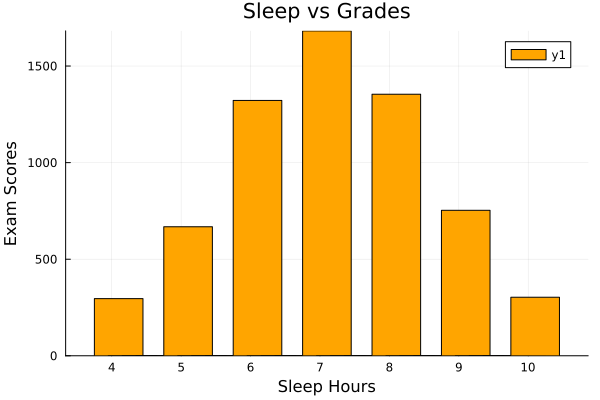

In [37]:
using Plots
histogram(df.Exam_Score, df.Sleep_Hours, bar_width=0.7, color=:orange, title="Sleep vs Grades",xlabel="Sleep Hours", ylabel="Exam Scores")

**Result:**
Students who got around 7 hours of sleep tended to score the highest on their assessments. Interestingly, as sleep hours increased beyond this point, scores gradually decreased, and the same trend was observed for students who slept less. This clearly highlights the important connection between sleep duration and academic performance, suggesting that finding that sweet spot for sleep is key to helping students excel.